In [1]:
# Run commands for beautifying figures
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and Visualizing a Decision Tree

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [4]:
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str(IMAGES_PATH / "iris_tree.dot"), 
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Go to https://dreampuf.github.io/GraphvizOnline/ , generate the imageand save it as 
    'iris-tree.png'

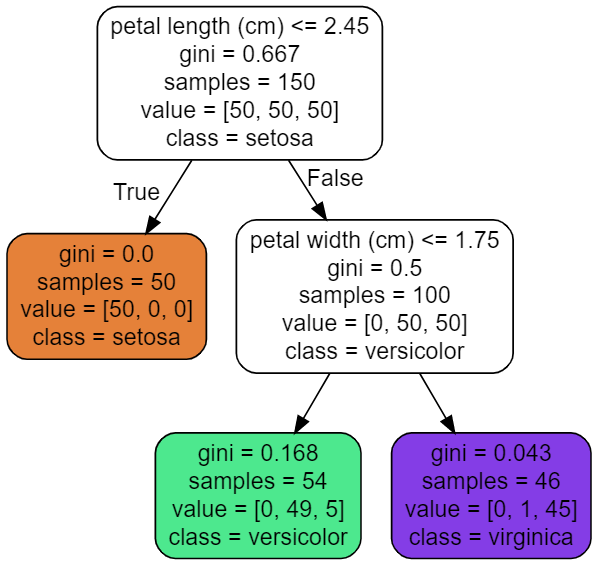

In [6]:
from IPython import display
display.Image(IMAGES_PATH / 'iris-tree.png')

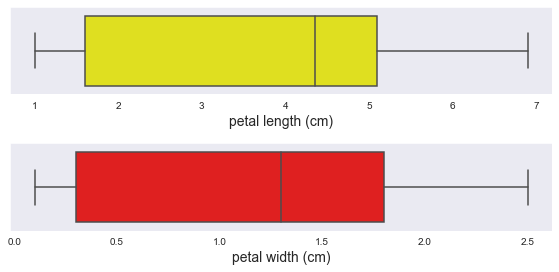

In [7]:
sns.set_style(style='dark')
plt.figure(figsize = (8,4))
plt.subplot(2, 1, 1)
sns.boxplot(x = iris.data["petal length (cm)"], color = 'yellow')
plt.subplot(2, 1, 2)
sns.boxplot(x = iris.data["petal width (cm)"], color = 'red')
save_fig('Boxplot Petal width and Height')

# Making Predictions

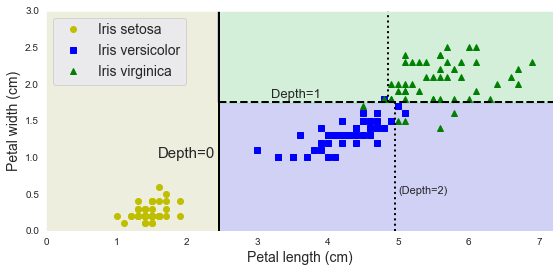

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

# Estimating class probabilities

In [9]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [10]:
tree_clf.predict([[5, 1.5]])

array([1])

# Heart Dataset

URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [11]:
import pandas as pd 
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [13]:
#Separate the independent variables from the dependent one
X= df.drop(columns = 'output')
y = df['output']

In [14]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(242, 13) (242,) (61, 13) (61,)


In [17]:
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))


Accuracy  0.836


In [18]:
X_train.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype=object)

In [19]:
export_graphviz(
        dt,
        out_file=str(IMAGES_PATH / "dec-tree-full.dot"), 
        feature_names=X_train.columns,
        class_names=['0','1'],
        rounded=True,
        filled=True
    )

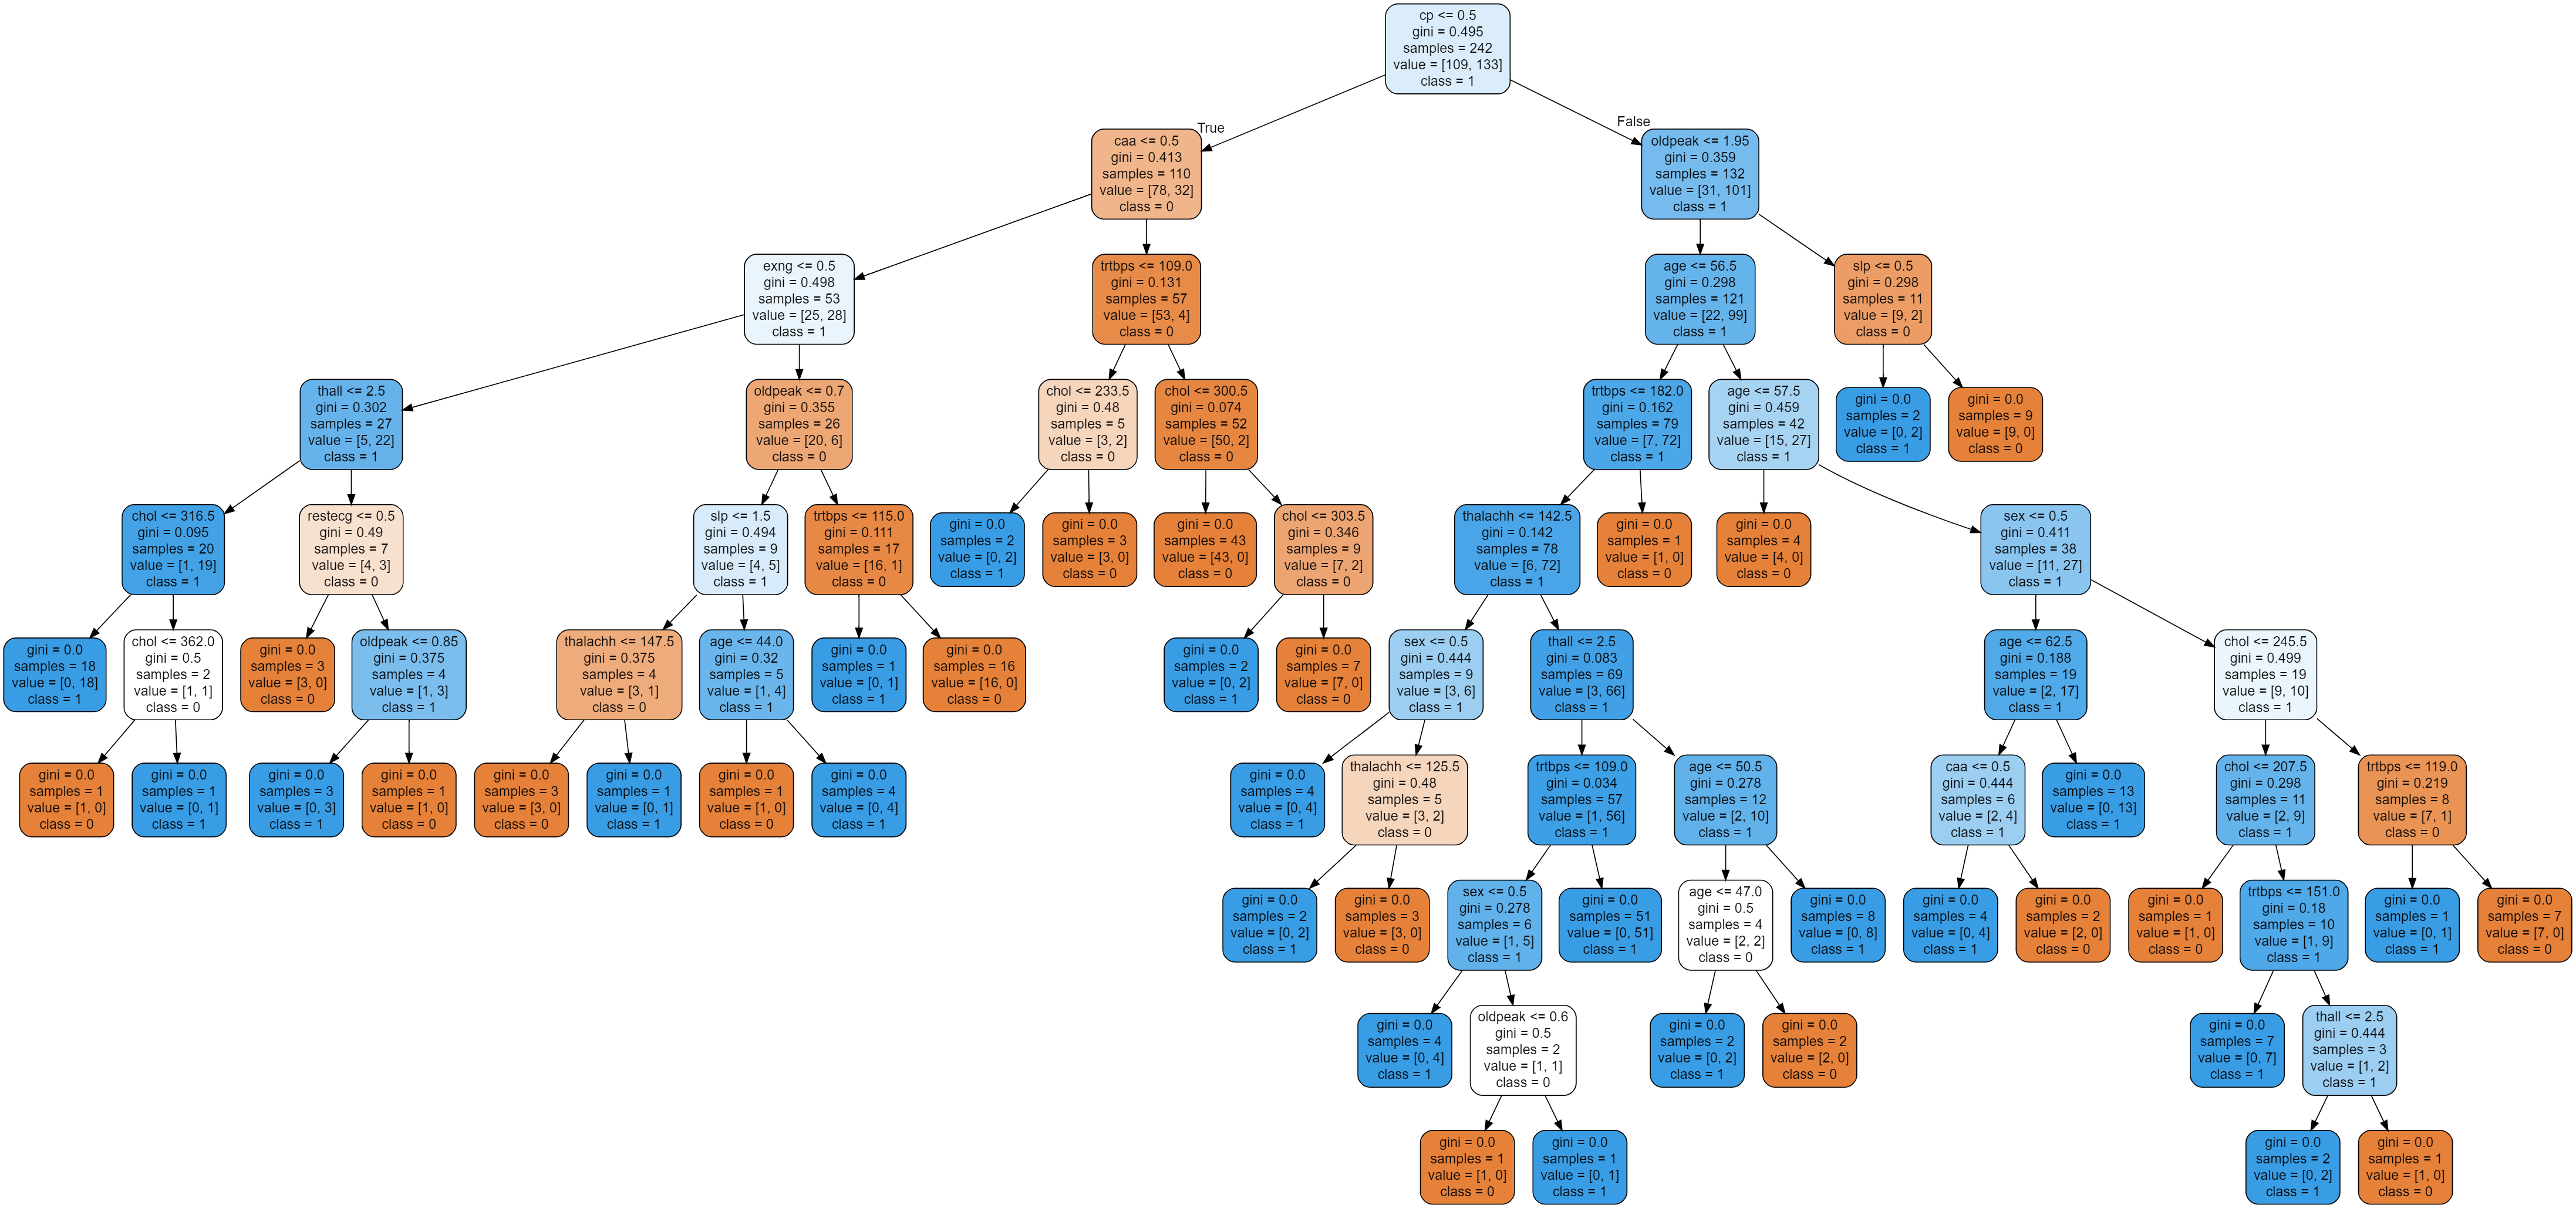

In [20]:
display.Image(IMAGES_PATH / 'heart-tree-full.png')

# Impact of Max-Depth on the Efficacy of Decision Tree Classifier (Analyzing Overfitting Issue)

Depth =  1 , Train Acc. =  0.74 , Test Acc. =  0.836
Depth =  2 , Train Acc. =  0.781 , Test Acc. =  0.787
Depth =  3 , Train Acc. =  0.847 , Test Acc. =  0.82
Depth =  4 , Train Acc. =  0.884 , Test Acc. =  0.852
Depth =  5 , Train Acc. =  0.913 , Test Acc. =  0.836
Depth =  6 , Train Acc. =  0.959 , Test Acc. =  0.852
Depth =  7 , Train Acc. =  0.988 , Test Acc. =  0.852
Depth =  8 , Train Acc. =  0.992 , Test Acc. =  0.836
Depth =  9 , Train Acc. =  1.0 , Test Acc. =  0.82
Depth =  10 , Train Acc. =  1.0 , Test Acc. =  0.82
Depth =  11 , Train Acc. =  1.0 , Test Acc. =  0.82
Depth =  12 , Train Acc. =  1.0 , Test Acc. =  0.803
Depth =  13 , Train Acc. =  1.0 , Test Acc. =  0.836
Depth =  14 , Train Acc. =  1.0 , Test Acc. =  0.836
Depth =  15 , Train Acc. =  1.0 , Test Acc. =  0.836
Depth =  16 , Train Acc. =  1.0 , Test Acc. =  0.803
Depth =  17 , Train Acc. =  1.0 , Test Acc. =  0.836
Depth =  18 , Train Acc. =  1.0 , Test Acc. =  0.803
Depth =  19 , Train Acc. =  1.0 , Test Acc. 

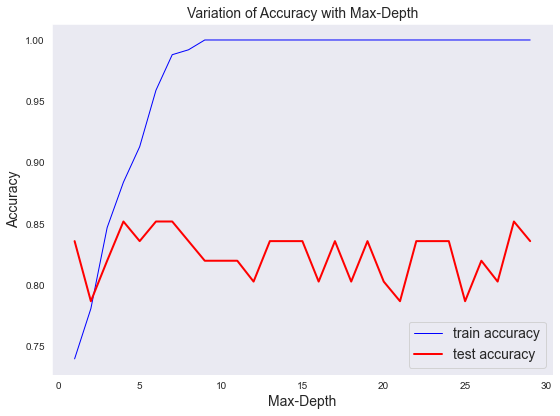

In [21]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

# Learning Curve

In [22]:
print(X_train.shape, y_train.shape)

(242, 13) (242,)


<Figure size 576x576 with 0 Axes>

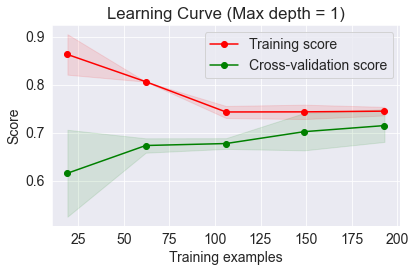

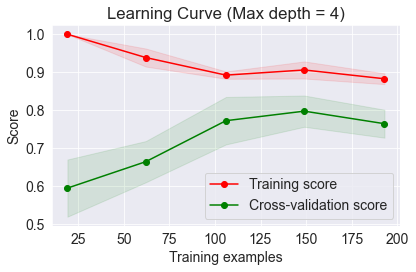

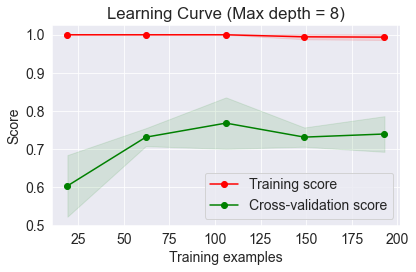

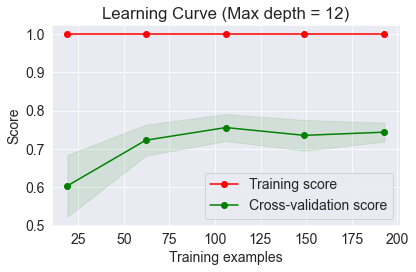

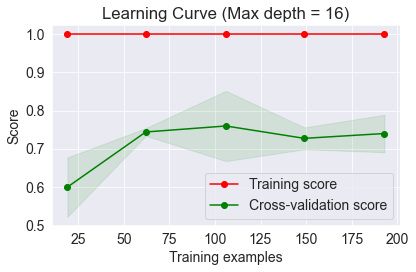

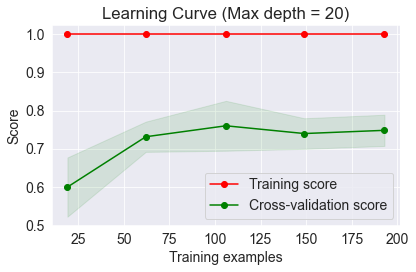

In [23]:
import scikitplot as skplt
plt.figure(figsize = (8,8))
depth = [1, 4, 8, 12, 16, 20]

for i in depth:
    clf = DecisionTreeClassifier(max_depth = i)
    str1 = 'Learning Curve (Max depth = '+ str(i) + ')'
    str2 = 'Learning Curve('+ str(i) + ')'
    skplt.estimators.plot_learning_curve(clf, X_train, y_train, title = str1)
    save_fig(str2);

# Classifier with a Max Depth of 4

In [24]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)

export_graphviz(
        dt,
        out_file=str(IMAGES_PATH / "dec-tree-4.dot"), 
        feature_names=X_train.columns,
        class_names=['0', '1'],
        rounded=True,
        filled=True
    )

Go to https://dreampuf.github.io/GraphvizOnline/ , generate the image and save it as 
    'heart-tree-depth 4.png'

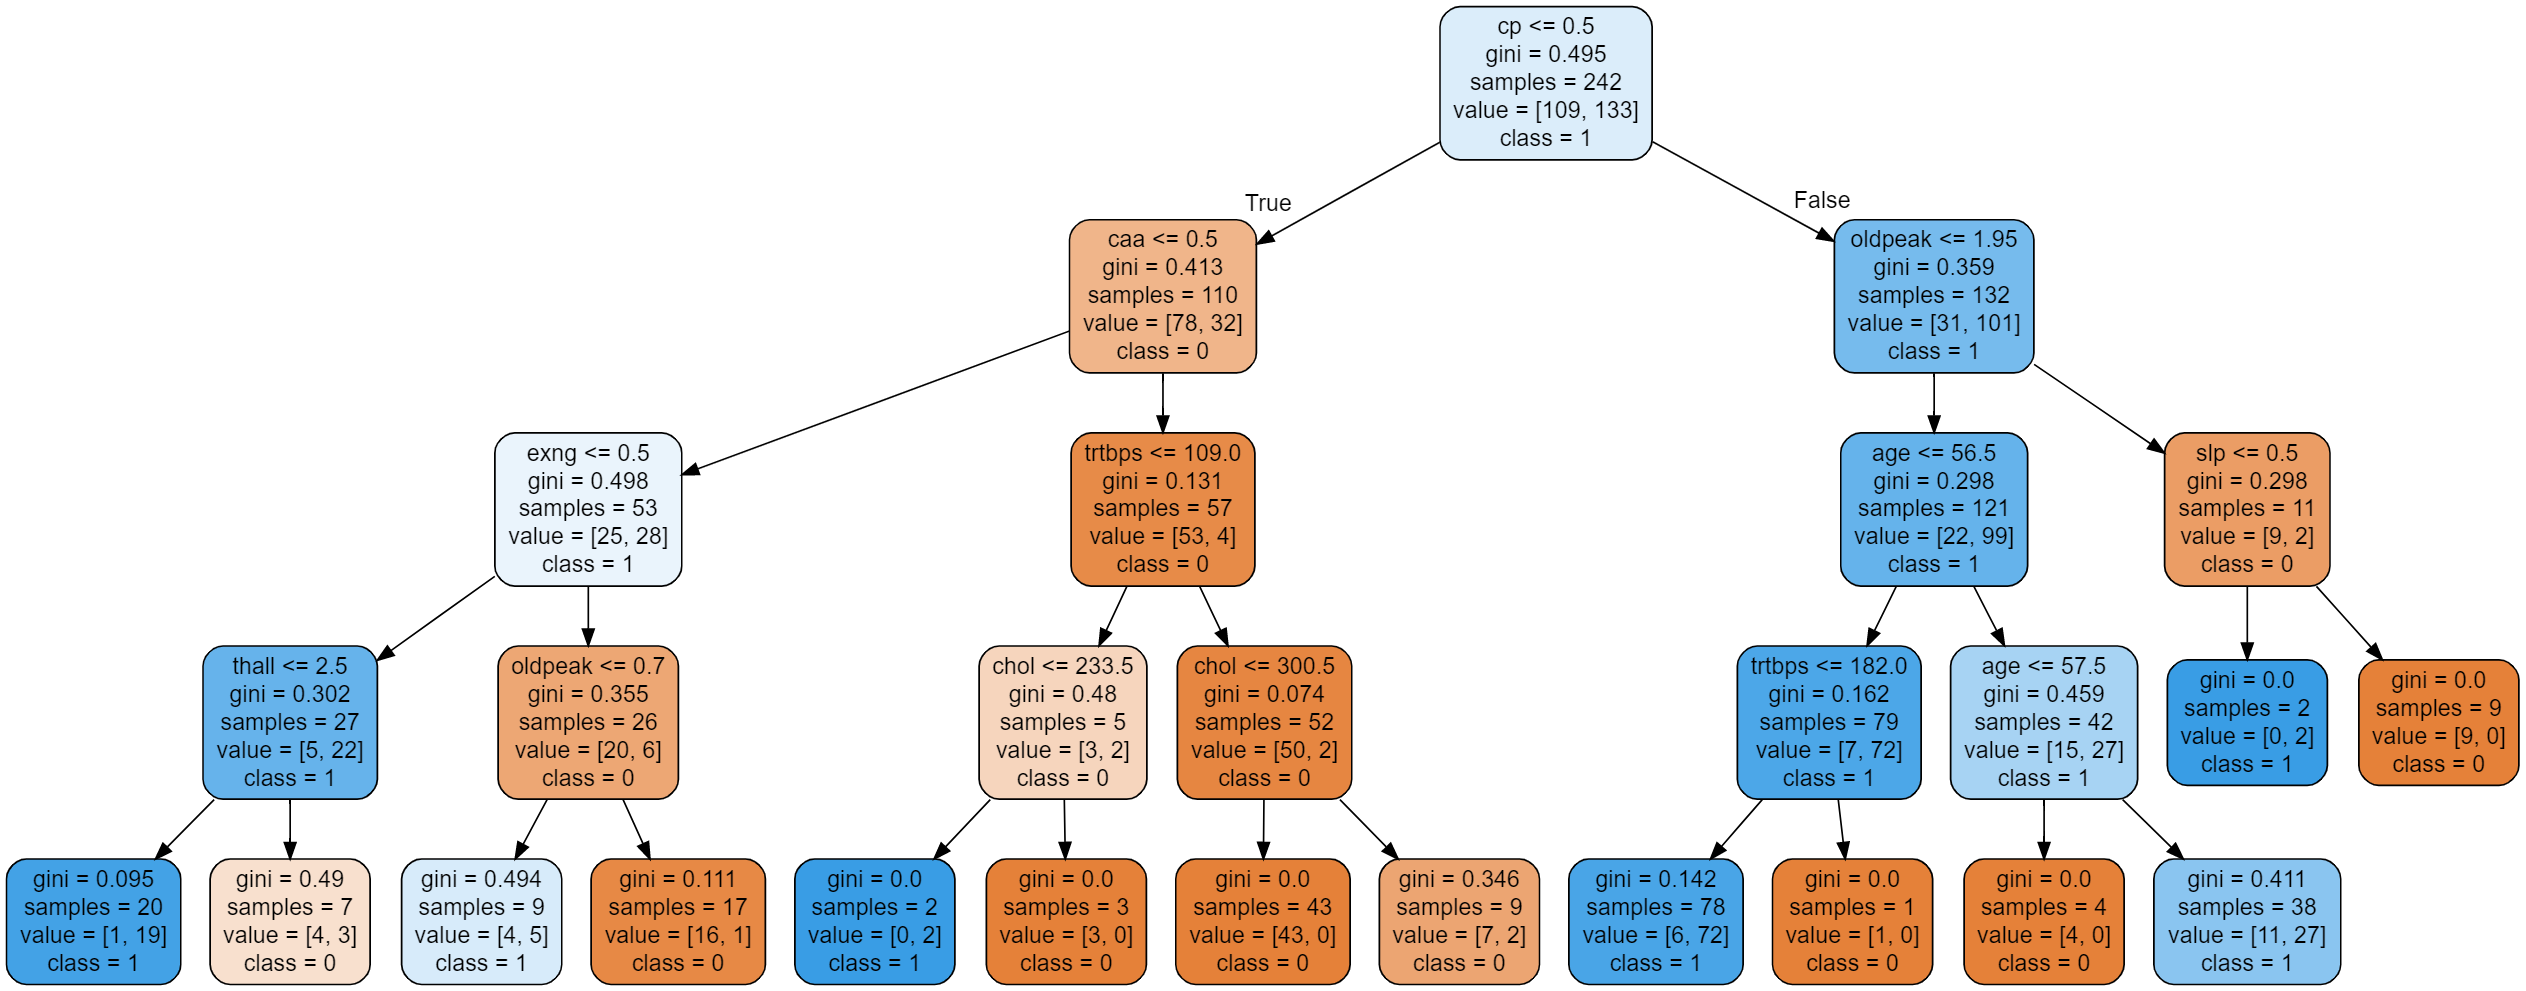

In [25]:

display.Image(IMAGES_PATH / 'heart-tree-depth 4.png')